In [3]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import WeibullFitter
import numpy as np
import matplotlib.pyplot as plt

In [4]:
heart = pd.read_csv('https://assets.datacamp.com/production/repositories/5850/datasets/3622fc55c18f157f4faa09c31458778b1e26f152/echocardiogram.csv')

In [5]:
heart.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [6]:
heart['death'] = np.where(heart['alive']==0,1,0)

In [7]:
heart['death'].value_counts()

1    88
0    45
Name: death, dtype: int64

In [8]:
heart.shape

(133, 14)

In [9]:
heart.isna().sum()

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
death                    0
dtype: int64

In [10]:
heart.dropna(subset=['survival'],inplace=True)

In [11]:
wb = WeibullFitter()

In [12]:
wb.fit(durations = heart['survival'], event_observed= heart['death'])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 130 total observations, 42 right-censored observations>

In [13]:
kmf = KaplanMeierFitter()
kmf.fit(durations = heart['survival'], event_observed= heart['death'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 130 total observations, 42 right-censored observations>

2.79195566720385 34.326650295262546


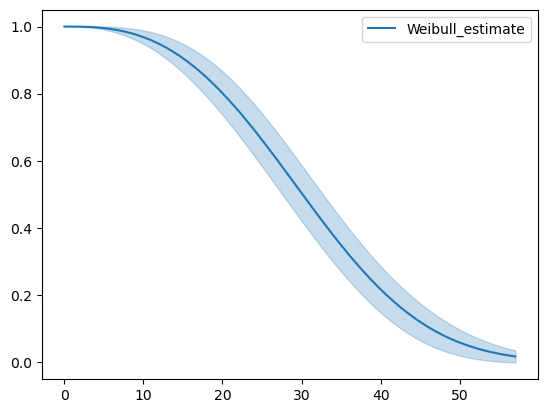

In [14]:
wb.plot_survival_function()
print(wb.rho_,wb.lambda_)

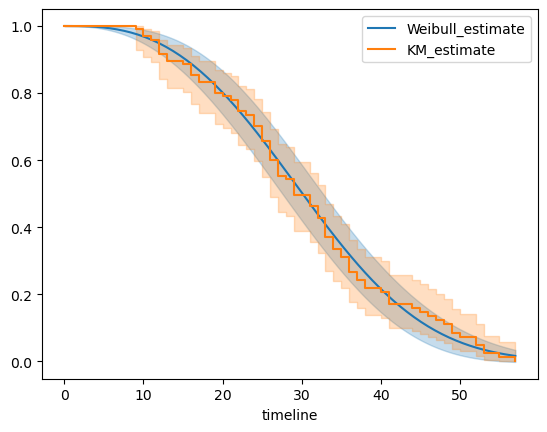

In [15]:
fig,ax = plt.subplots()
ax = wb.plot_survival_function()
ax = kmf.plot_survival_function()

> Already visual inspection tells us that for this data the weibull model is a good estimator. Another formal method is using a qq plot which plots the empirical quqntiles against the predicted ones

### Show AFT here and how it works

In [13]:
from lifelines import WeibullAFTFitter

In [14]:
aft = WeibullAFTFitter()

In [15]:
heart['epss'] = heart['epss'].fillna(heart['epss'].median())

In [16]:
heart['lvdd'] = heart['lvdd'].fillna(heart['lvdd'].median())

In [17]:
heart['fractionalshortening'] = heart['fractionalshortening'].fillna(heart['fractionalshortening'].median())

In [18]:
heart['fractionalshortening']

0      0.260
1      0.380
2      0.260
3      0.253
4      0.160
       ...  
128    0.240
129    0.280
130    0.200
131    0.140
132    0.150
Name: fractionalshortening, Length: 130, dtype: float64

In [20]:
aft.fit(heart,duration_col='survival',event_col='death')

ValueError: could not convert string to float: 'name'

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
aft.summary

In [55]:
heart_tot=heart.select_dtypes(exclude='object')

In [57]:
heart_tot.shape

(130, 12)

In [59]:
heart_tot.dropna(inplace=True)

### Use the prison dataset for article

In [16]:
prison = pd.read_csv('https://assets.datacamp.com/production/repositories/5850/datasets/4e20aa97a26bbe32106a94b76ae4cabf1a632d59/rossi.csv')

In [17]:
prison.shape

(432, 10)

In [18]:
prison.head()

,Unnamed: 0,week,arrest,fin,age,race,wexp,mar,paro,prio
0,0,20,1,0,27,1,0,0,1,3
1,1,17,1,0,18,1,0,0,1,8
2,2,25,1,0,19,0,1,0,1,13
3,3,52,0,1,23,1,1,1,1,1
4,4,52,0,0,19,0,1,0,1,3


In [19]:
from lifelines import LogNormalFitter
from lifelines import ExponentialFitter
from lifelines import LogLogisticFitter
from lifelines import KaplanMeierFitter
from lifelines import WeibullFitter
from lifelines.plotting import qq_plot

In [20]:
wb = WeibullFitter()
ln = LogNormalFitter()
Exp = ExponentialFitter()
logit = LogLogisticFitter()
kmf = KaplanMeierFitter()

In [21]:
wb.fit(durations=prison['week'],event_observed=prison['arrest'])
ln.fit(durations=prison['week'],event_observed=prison['arrest'])
Exp.fit(durations=prison['week'],event_observed=prison['arrest'])
logit.fit(durations=prison['week'],event_observed=prison['arrest'])
kmf.fit(durations=prison['week'],event_observed=prison['arrest'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 432 total observations, 318 right-censored observations>

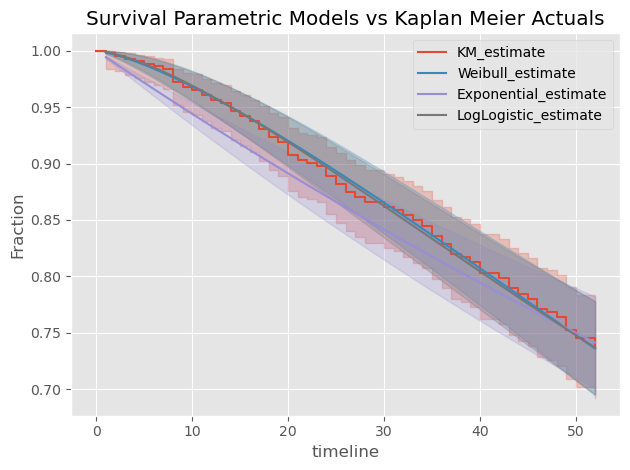

In [22]:
plt.style.use('ggplot')
fig,ax = plt.subplots()
ax = kmf.plot_survival_function()
ax = wb.plot_survival_function()
ax = Exp.plot_survival_function()
ax = logit.plot_survival_function()
ax.set_title('Survival Parametric Models vs Kaplan Meier Actuals')
ax.set_ylabel('Fraction')
plt.tight_layout()
plt.savefig('check_distribution.png')

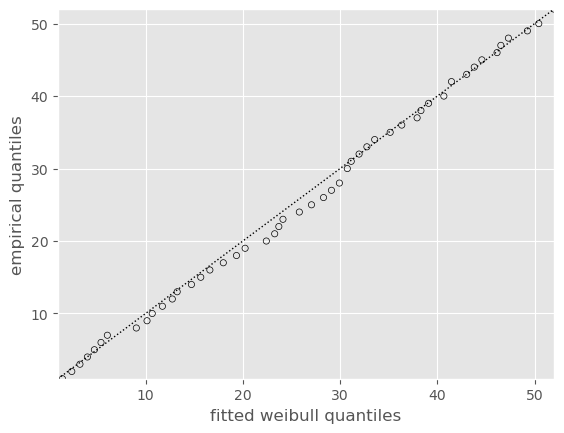

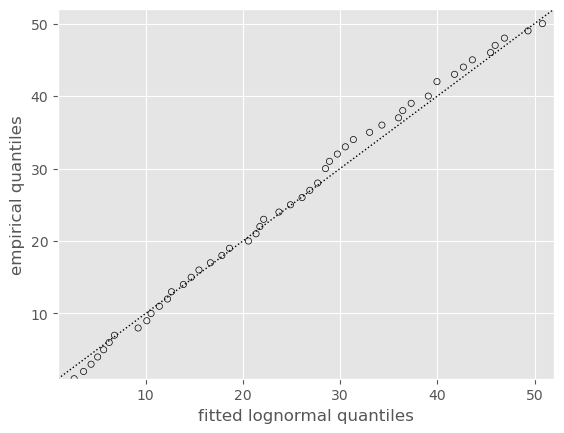

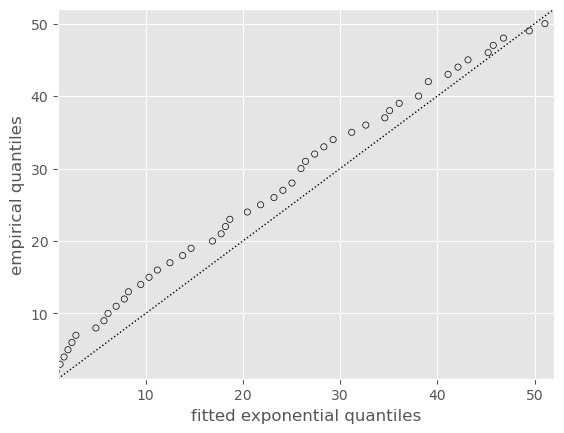

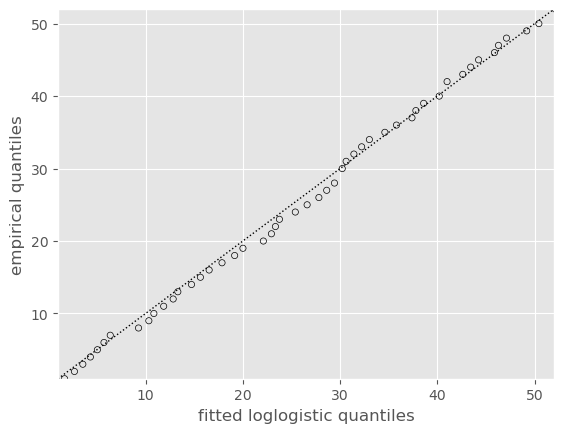

In [23]:
models = [wb,ln,Exp,logit]
for model in models:
    qq_plot(model)
    plt.show()

In [24]:
import lifelines

In [25]:
best_model,best_aic = lifelines.utils.find_best_parametric_model(prison['week'],prison['arrest'])

In [26]:
best_model

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 432 total observations, 318 right-censored observations>

In [27]:
wb.fit(durations=prison['week'],event_observed=prison['arrest'])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 432 total observations, 318 right-censored observations>

In [28]:
kmf.fit(durations=prison['week'],event_observed=prison['arrest'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 432 total observations, 318 right-censored observations>

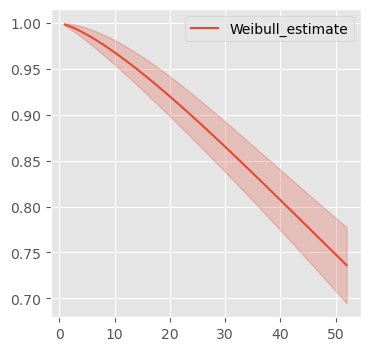

In [29]:
fig,ax = plt.subplots(figsize=(4,4))
#ax = kmf.plot_survival_function()
ax = wb.plot_survival_function()

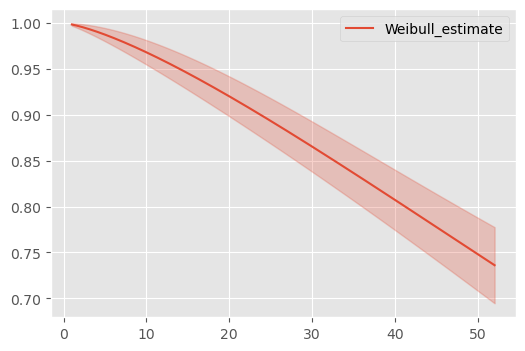

In [30]:
fig,ax = plt.subplots(figsize=(6,4))
#ax = kmf.plot_survival_function()
ax = wb.plot_survival_function()

In [31]:
from lifelines import WeibullAFTFitter

In [32]:
aft = WeibullAFTFitter()

In [33]:
aft.fit(prison,duration_col='week',event_col='arrest')

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>

In [38]:
df=aft.summary

In [41]:
df.to_csv('Summary.csv')

In [36]:
new=prison.sample(n=3)

In [38]:
aft.predict_survival_function(new).transpose()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,52.0
278,0.999089,0.997578,0.995712,0.993571,0.991201,0.988634,0.985892,0.982991,0.979946,0.976768,...,0.836819,0.831801,0.826764,0.821711,0.816643,0.811562,0.806467,0.801362,0.796245,0.785987
205,0.998570,0.996202,0.993279,0.989930,0.986229,0.982224,0.977951,0.973440,0.968713,0.963789,...,0.756137,0.749034,0.741929,0.734827,0.727728,0.720635,0.713550,0.706474,0.699410,0.685322
374,0.998863,0.996979,0.994652,0.991985,0.989034,0.985840,0.982428,0.978823,0.975042,0.971099,...,0.800702,0.794715,0.788716,0.782707,0.776689,0.770663,0.764632,0.758597,0.752559,0.740482


In [39]:
prison.mar.unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Effect of priors on time to arrest')

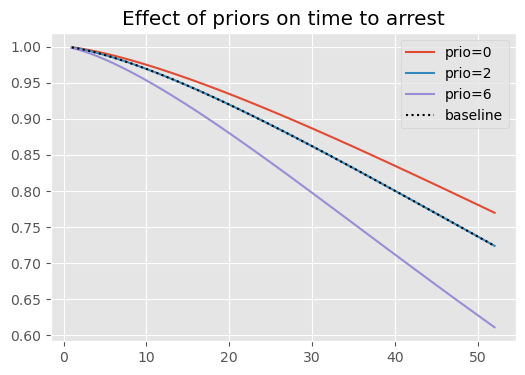

In [45]:
fig,ax = plt.subplots(figsize=(6,4))
ax = aft.plot_partial_effects_on_outcome('prio',[0,2,6])
plt.title('Effect of priors on time to arrest')

Text(0.5, 1.0, 'Effect of age on time to arrest')

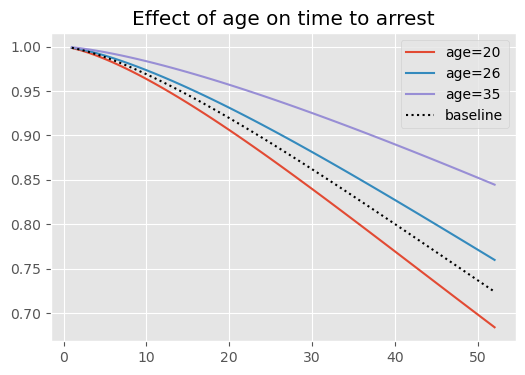

In [46]:
fig,ax = plt.subplots(figsize=(6,4))
aft.plot_partial_effects_on_outcome('age',[20,26,35])
plt.title('Effect of age on time to arrest')

In [52]:
telco = pd.read_csv('Telco_churn.csv')

In [53]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
telco['true_loss'] = np.where(telco['Churn']=='Yes',1,0)

In [119]:
telco = telco.loc[telco['true_loss']==1,:]

In [120]:
kmf = KaplanMeierFitter()

In [121]:
kmf.fit(durations=telco['tenure'],event_observed = telco['true_loss'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1869 total observations, 0 right-censored observations>

<Axes: xlabel='timeline'>

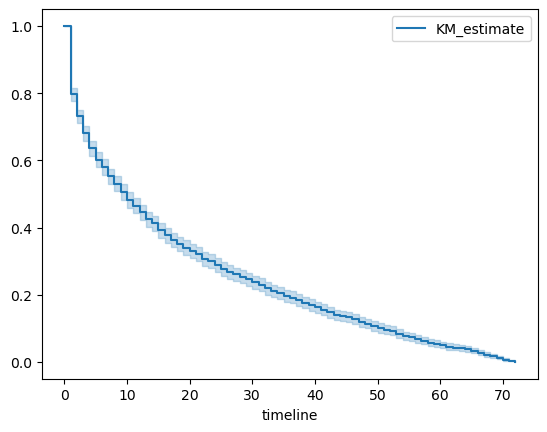

In [122]:
kmf.plot_survival_function()

In [123]:
import lifelines.utils

In [124]:
from lifelines import LogNormalFitter
from lifelines import ExponentialFitter
from lifelines import LogLogisticFitter
from lifelines.plotting import qq_plot

In [125]:
wb = WeibullFitter()
ln = LogNormalFitter()
Exp = ExponentialFitter()
logit = LogLogisticFitter()

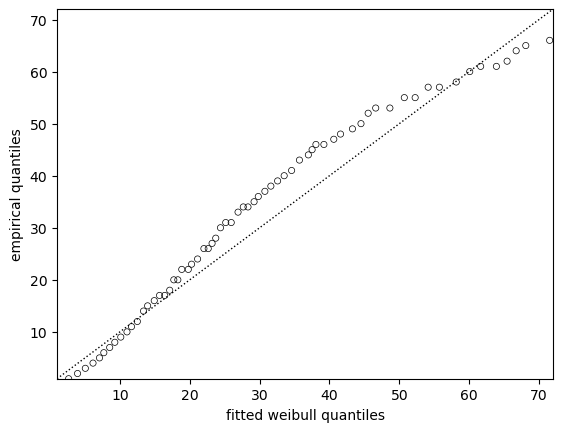

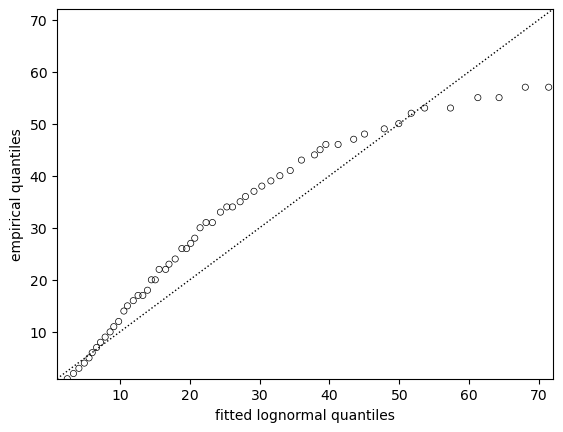

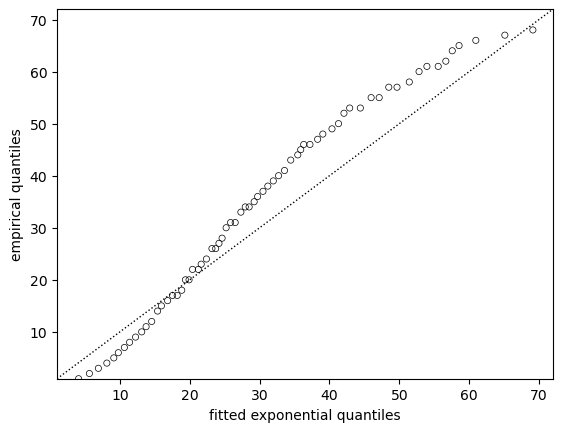

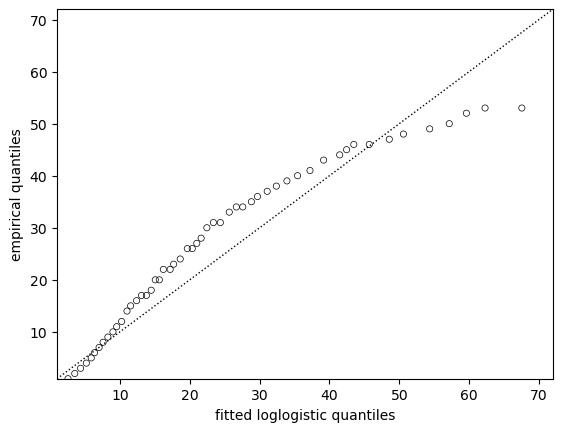

In [126]:
models = [wb,ln,Exp,logit]
for model in models:
    model.fit(telco['tenure'],telco['true_loss'])
    qq_plot(model)
    plt.show()

In [127]:
from lifelines import WeibullFitter

In [128]:
wb = WeibullFitter()

In [129]:
wb.fit(telco['tenure'],telco['true_loss'])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1869 total observations, 0 right-censored observations>

In [130]:
telco['tenure'] = np.where(telco['tenure']==0,1,telco['tenure'])

C:\Users\gaura\AppData\Local\Temp\ipykernel_1040\2662421073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco['tenure'] = np.where(telco['tenure']==0,1,telco['tenure'])


In [131]:
kmf.fit(durations=telco['tenure'],event_observed = telco['true_loss'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1869 total observations, 0 right-censored observations>

In [132]:
best_model,best_aic=lifelines.utils.find_best_parametric_model(telco['tenure'],telco['true_loss'])

In [133]:
best_aic

14210.723526453461

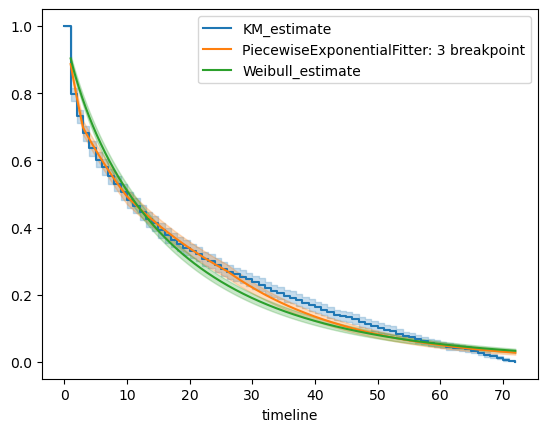

In [138]:
fig,ax = plt.subplots()
ax = kmf.plot_survival_function()
ax = best_model.plot_survival_function()
ax = wb.plot_survival_function()
#ax = logit.plot_survival_function()

In [137]:
print(wb.median_survival_time_)
print(kmf.median_survival_time_)
print(best_model.median_survival_time_)

10.346421165981878
10.0
9.683085809264176


In [31]:
from lifelines.plotting import qq_plot

In [142]:
best_model

<lifelines.PiecewiseExponentialFitter:"PiecewiseExponentialFitter: 3 breakpoint", fitted with 1869 total observations, 0 right-censored observations>

In [143]:
from lifelines import PiecewiseExponentialFitter

In [75]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,true_loss
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [141]:
best_model.params_

lambda_0_     8.293429
lambda_1_    20.165306
lambda_2_    26.665997
lambda_3_    20.163528
Name: coef, dtype: float64